# Tasks

Author: Eoin Wilkie.

## Task 1: Calculate a square root
Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

In [1]:
def sqrt(x):
    """
    A function to calculate the square root of a number x.
    This is Ian's example.
    """
    # initial guess for the aquare root z.
    z = x / 2
    # Loop until we're happy with the accuracy.
    while abs(x - (z*z)) > 0.0000000000001:
        # Calculate a better guess for the square root.
        z -= (z*z - x) / (z * z)
    # Return the (approximate) square root of x.
    return z
    

##### Explaination of code.  

My implementation is based on Newton's method. Each iteration produces an approximation and successive results become more precise.  
The method takes a number input and determines the root by dividing the number in half.  
Afterwards the method enters a loop which repeats 7 times, the assigned number of iterations.  
The root value is re-assigned to *root -= func(root, number) / derivFunc(root)*.  
Below, the value of root is shown after each iteration. The final iteration is the result.

- Iteration 1: 1.5
- Iteration 2: 1.4166666666666667
- Iteration 3: 1.4142156862745099
- Iteration 4: 1.4142135623746899
- Iteration 5: 1.4142135623730951
- Iteration 6: 1.414213562373095
- Iteration 7: 1.4142135623730951

In [2]:
def func(root, number):
    return root * root - number

In [3]:
def derivFunc(root):
    return 2 * root

In [4]:
def sqrt2(number):
    """
    My code is based on Newton's method. 
    """
    
    iterations = 7
    precision = 0.00000001
    root = number / 2
    
    for i in range(iterations):
        # Result is not within the desired precision.
        if abs(root) <= precision:
            return root

        # Newton's computation, and update value to repeat process.
        root -= func(root, number) / derivFunc(root)
        
        # Testing purposes. 
        print(f"Iteration {i+1}: {root}")
   
    return root

#### Testing sqrt

In [5]:
print("This code was provided in class, it will be used to compare results.")
print(f"sqrt(2): {sqrt(2)}")
print()
print("My implementation:")
print("start")
print(sqrt2(2))
print("end")

## Task2: Chi-squared test

The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table and states the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.


In [6]:
'''
Creating the data.
'''

import pandas as pd

data = {'A': [90,30,30],
        'B': [60,50,40],
        'C': [104,51,45],
        'D': [95,20,35]
       }
pf = pd.DataFrame(data, columns=['A', 'B', 'C', 'D'], index=['White collar', 'Blue collar', 'No collar'])

Data output.

In [7]:
pf2 = pf.copy()

#Adding totals

pf2.loc['Total']= pf2.sum(numeric_only=True, axis=0)
pf2.loc[:,'total'] = pf2.sum(numeric_only=True, axis=1)

print(pf2)

                A    B    C    D  total
White collar   90   60  104   95    349
Blue collar    30   50   51   20    151
No collar      30   40   45   35    150
Total         150  150  200  150    650


#### Explaination of code.

chi2_contingency is imported from the scipy.stats module, it performs a chi-squared test on a data set.
The following variables are returned.

- **chi2:** This is the Chi-squared value which is expected to be approximately 24.6
- **p:** P-value is the probability of obtaining test results at least as extreme as the results actually observed. Our confidence in the result.
- **dof:** Degrees of freedom, which is the freedom for the results to vary.
- **expected:** The expected frequencies, based on the marginal sums of the table.

Expected results = each cell is assigned a value based on column total*(row_total/total).  
Chi2 = For each cell you get the sum of (pow2(observed-expected)/ expected) for each cell.  
DoF = (num_rows - 1)*(num_Col).  
P-value calculator can be found here [9].


In [8]:
'''
Using scipy.stats.chi2_contingency to confirm the results.
'''

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pf)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     24.571
p-value:            0.00040984
degrees of freedom: 6
expected frequencies:
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


#### Testing chi-squared

In [9]:
'''
Confirm the results by rounding to 1 decimal.
I am unsure of a better way to confirm the closeness of the expected and actual results.
'''
import math

expectedChi2=24.6

# Results
print(f"Expected Chi-squared: {expectedChi2}\nActual Chi-squared: {round(chi2, 1)}")
print(f"Match found: {math.isclose(expectedChi2, round(chi2, 1))}")

Expected Chi-squared: 24.6
Actual Chi-squared: 24.6
Match found: True


## Task 3: Research STDEV.P and STDEV.S

The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x)) ** 2)/len(x)).

However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x).

Research these Excel functions, writing a note in a Markdown cell about the difference between them.

Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.

### Difference between population and sample

##### STDEV.P
Standard Deviation: Population.
- Data contains all members of the population, 
- Used if the data represents the entire population.
- Results are accurate because the dataset is complete.


##### STDEV.S
Standard Deviation: Sample.
- Data does not contain all members of the population.
- Used if the data is just a sample, and you want to generalise to the entire population.
- Results are not accurate because the dataset is not complete.

In excel, STDEV.S uses Bessel's correction to provide a better estimation for a sample.

##### Bessel's correction
Bessel's correction refers to the "n-1" found in STDEV.S. The use of STDEV.P assumes a whole population of data is available, results will not be accurate when working with a sample.
Bessel's correction adjusts the formula to have a deflated sum, more representative for a sample.[10]

#### Example

In [21]:
import numpy as np
import random


size = [5,10,100,500,1000,5000,10000, 50000, 100000]

# Creates sets with the size given in above array.
# Prints the STDEV.P and STD.S.
for i in size:
    if i != 0:
        nums = np.random.randint(1,1000,(i))
        sample = np.random.choice(nums, int(i/4))
    
    print("Size of population: ", len(nums))
    print("\tSTDEV:P:\t\t%.3f" % np.std(nums))
    print("Size of sample: ", len(sample))
    print("\tSTDEV.S of sample:\t%.3f" % np.std(sample, ddof=1))
    print("\tSTDEV.S of whole:\t%.3f" % np.std(nums, ddof=1))
    print()


Size of population:  5
	STDEV:P:		116.440
Size of sample:  1
	STDEV.S of sample:	nan
	STDEV.S of whole:	130.184

Size of population:  10
	STDEV:P:		308.982
Size of sample:  2
	STDEV.S of sample:	506.288
	STDEV.S of whole:	325.696

Size of population:  100
	STDEV:P:		271.497
Size of sample:  25
	STDEV.S of sample:	273.062
	STDEV.S of whole:	272.865

Size of population:  500
	STDEV:P:		304.479
Size of sample:  125
	STDEV.S of sample:	312.415
	STDEV.S of whole:	304.784

Size of population:  1000
	STDEV:P:		289.915
Size of sample:  250
	STDEV.S of sample:	285.678
	STDEV.S of whole:	290.060

Size of population:  5000
	STDEV:P:		286.722
Size of sample:  1250
	STDEV.S of sample:	283.903
	STDEV.S of whole:	286.751

Size of population:  10000
	STDEV:P:		289.055
Size of sample:  2500
	STDEV.S of sample:	286.618
	STDEV.S of whole:	289.069

Size of population:  50000
	STDEV:P:		288.546
Size of sample:  12500
	STDEV.S of sample:	287.605
	STDEV.S of whole:	288.549

Size of population:  100000
	STDEV

#### Conclusion

The difference between STDEV.P and STDEV.S decreases as the size of the array increases.
STDEV.S no longer seems to be useful as the sample size increases.[11]

## Task 4: Machine Learning

Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. 

Explain in a Markdown cell how your code works and how accurate it might
be, and then explain how your model could be used to make predictions of species of iris.

#### Loading the data.
The data is loaded from sklearn.datasets[12]

In [11]:
# Loading the data from the dataset.
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

Iris dataset information.

In [12]:
print("Shape")
print("Data:", X.shape)
print("Target:", y.shape)
print("Target names:", iris.target_names)

print(y)

Shape
Data: (150, 4)
Target: (150,)
Target names: ['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#### Machine Learning

In [14]:
# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Plotting.
import matplotlib.pyplot as plt

Using the K-Means clustering for machine learning. K-Means is a clustering algorithm.

The algorithm identifies the cluster center of the datapoints associated with the cluster. Predictions are based on which cluster center is closest to the value.[13]

In [15]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [16]:
cent = kmeans.cluster_centers_
print("Cluster centers:")
cent

Cluster centers:


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### Predictions.

Making predictions based on the iris dataset.

In [17]:
# Predict the cluster for two points.
predictions = kmeans.predict(X)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


#### Visualising the data.

[Text(0, 0.5, 'length'), Text(0, 0.5, 'length')]

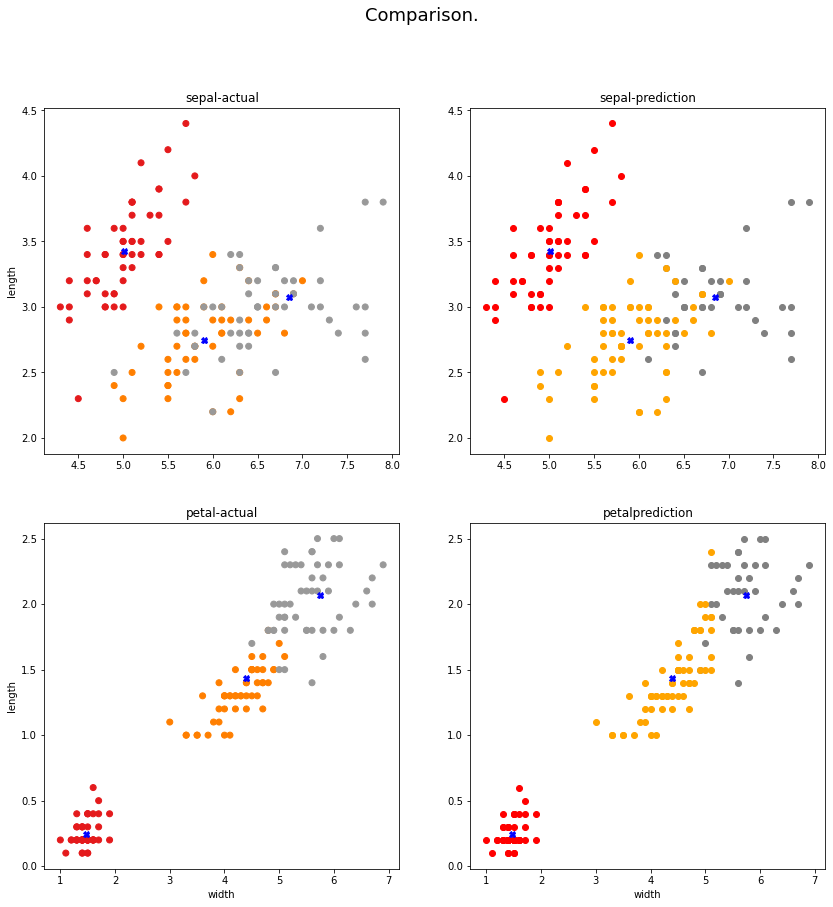

In [18]:
fig, axes = plt.subplots(2,2, figsize=(14, 14))
fig.suptitle('Comparison.', fontsize=18)

ax0 = axes[0][0]
ax1 = axes[0][1]
ax2 = axes[1][0]
ax3 = axes[1][1]

# == x1
# Plot sepal
ax0.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
ax0.plot(cent[:,0], cent[:,1], 'bX')
ax0.set_title("Actual")

# Plot petal
ax1.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'o', color="gray")
ax1.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'o', color="red")
ax1.plot(X[kmeans.labels_ == 2][:,0], X[kmeans.labels_ == 2][:,1], 'o', color="orange")
ax1.plot(cent[:,0], cent[:,1], 'bX')
ax1.set_title("Prediction")

# == x2
# Plot sepal
ax2.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1)
ax2.plot(cent[:,2], cent[:,3], 'bX')
ax2.set_title("Actual")

# Plot petal
ax3.plot(X[kmeans.labels_ == 0][:,2], X[kmeans.labels_ == 0][:,3], 'o', color="gray")
ax3.plot(X[kmeans.labels_ == 1][:,2], X[kmeans.labels_ == 1][:,3], 'o', color="red")
ax3.plot(X[kmeans.labels_ == 2][:,2], X[kmeans.labels_ == 2][:,3], 'o', color="orange")
ax3.plot(cent[:,2], cent[:,3], 'bX')
ax3.set_title("Prediction")

ax0.title.set_text('sepal-actual')
ax1.title.set_text('sepal-prediction')
ax2.title.set_text('petal-actual')
ax3.title.set_text('petalprediction')

plt.setp(axes[-1, :], xlabel='width')
plt.setp(axes[:, 0], ylabel='length')

#### Accuracy

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.[14]

In [19]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y, predictions)

print('Adjusted rand score: {0:.2f}%'.format(score*100))

Adjusted rand score: 73.02%


The k_means algorithm will not accuratly predict the flower, it finds patterns and tries best to fit the prediction into a cluster. This has limitations, as seen by the roughly 75% adjusted rand score.

#### Additional thoughts
I wonder how adding weighted values to the algorithm would effect the accuracy. Each colour has defining features.

Red has long, thin sepal with short, thin petals. The petal features present strong clustering as there are no non-red values near this cluster. When atempting to predict the values, the petal values could be of more value than the sepal values. 

While red seems to have been predicted correctly, orange and gray have a few wrongly predicted values and it seems to be because the sepal and petal values are calculated at an equal value, where as in both cases the petal is clustered (showing a pattern, for gray, this is long and wide and for orange it is of medium length and width.), while the sepal, in both cases is dispersed. 

References:  
[1] Finding square roots of of numbers that aren't perfect squares without a calculator:
http://www.math.com/school/subject1/lessons/S1U1L9DP.html  
[2] Newton's method https://en.wikipedia.org/wiki/Newton's_method  
[3] An implementation of Newton's method:  
https://www.geeksforgeeks.org/program-for-newton-raphson-method/  
[4] Additional information on how NEwton's method works:  
http://www.math.pitt.edu/~sussmanm/2070/lab_04/index.html 
[5] Information on how chi2_contingency works:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html  
[6] Chi2_contingency implementation:
https://stackoverflow.com/questions/64669448/understanding-scipy-stats-chisquare  
[7] Chi-squared test:
https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096  
[8] p-value:
https://en.wikipedia.org/wiki/P-value  
[9] Calculating p-value:  https://www.gigacalculator.com/calculators/chi-square-to-p-value-calculator.php  
[10] Bessel's correction: https://www.statisticshowto.com/bessels-correction/   
[11] Standard deviation calculation: https://exceljet.net/formula/standard-deviation-calculation  
[12] Iris dataset: 
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html  
[13] What is K-means Clustering in Machine Learning?: https://www.analyticssteps.com/blogs/what-k-means-clustering-machine-learning  
[14] sklearn.metrics.adjusted_rand_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html  